In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [5]:
df = pd.read_csv('../Dataset/Cleaned_Data.csv')

In [6]:
df.head()

,Unnamed: 0,location,size,total_sqft,bath,price,bhk,unit
0,0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,NaN
1,1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,NaN
2,2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,NaN
3,3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,NaN
4,4,Kothanur,2 BHK,1200.0,2.0,51.00,2,NaN


In [7]:
df.drop(columns='unit',inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13303 entries, 0 to 13302
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  13303 non-null  int64  
 1   location    13303 non-null  object 
 2   size        13303 non-null  object 
 3   total_sqft  13303 non-null  float64
 4   bath        13303 non-null  float64
 5   price       13303 non-null  float64
 6   bhk         13303 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 727.6+ KB


In [9]:
df.head()

,Unnamed: 0,location,size,total_sqft,bath,price,bhk
0,0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [10]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [11]:
df.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [12]:
# making a column of price_per_sqft for later checking outliers
df_copy = df.copy()

In [13]:
df_copy['price_per_sqft'] = df_copy['price']*100000 / df_copy['total_sqft']

In [14]:
df_copy.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [15]:
#location
len(df_copy['location'].unique())

1304

In [16]:
#handling text data, we do OneHotEncoding, and if there are 1304 values then space usage is very highj
#so we can filter - the locations with less than 10 datapoints can be treated as Other
df_copy['location'] = df_copy['location'].apply(lambda x : x.strip())
location_stats = df_copy.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield                            540
Sarjapur  Road                        397
Electronic City                       304
Kanakpura Road                        273
Thanisandra                           237
                                     ... 
poornaprajna layout                     1
pavitra paradise                        1
near Ramanashree California resort      1
mvj engineering college                 1
1Kasavanhalli                           1
Name: location, Length: 1293, dtype: int64

In [17]:
len(location_stats[location_stats<=10])

1052

In [18]:
locations_less_than_10 = location_stats[location_stats<=10]
locations_less_than_10

location
Kalkere                               10
Sadashiva Nagar                       10
BTM 1st Stage                         10
Basapura                              10
Gunjur Palya                          10
                                      ..
poornaprajna layout                    1
pavitra paradise                       1
near Ramanashree California resort     1
mvj engineering college                1
1Kasavanhalli                          1
Name: location, Length: 1052, dtype: int64

In [19]:
len(df_copy['location'].unique())

1293

In [20]:
df_copy['location'] = df_copy['location'].apply(lambda x : 'other' if x in locations_less_than_10 else x)
len(df_copy['location'].unique())

242

Outlier Detection

In [21]:
#based on domain knowledge, we know that bedroom sqft cant be below 300
df_copy[df_copy['total_sqft']/df_copy['bhk'] < 300]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000
...,...,...,...,...,...,...,...
13260,other,7 Bedroom,1400.0,7.0,218.0,7,15571.428571
13262,other,6 Bedroom,1200.0,5.0,130.0,6,10833.333333
13264,Margondanahalli,5 Bedroom,1375.0,5.0,125.0,5,9090.909091
13286,Vidyaranyapura,5 Bedroom,774.0,5.0,70.0,5,9043.927649


In [22]:
# we have to remove these
df_copy2 = df_copy[~(df_copy['total_sqft']/df_copy['bhk'] < 300)]
df_copy2.shape

(12555, 7)

In [23]:
#price per sqft
df_copy2['price_per_sqft'].describe()
df_copy2.shape

(12555, 7)

In [24]:
#remove outliers 
#for every location we will find lower/higher fence values, and then remove outliers
#we will do for every location separately becuase different locations have different demands, pricing

def remove_pps_outliers_iqr(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        Q1 = subdf['price_per_sqft'].quantile(0.25)
        Q3 = subdf['price_per_sqft'].quantile(0.75)
        IQR = Q3 - Q1
        lower_fence = Q1 - 1.5*IQR
        higher_fence = Q3 + 1.5*IQR
        reduced_df = subdf[(subdf['price_per_sqft'] >= (lower_fence)) &
                           (subdf['price_per_sqft'] <= (higher_fence))]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out

df_clean = remove_pps_outliers_iqr(df_copy2)


In [25]:
df_clean['price_per_sqft'].describe()

count    11667.000000
mean      5724.380833
std       2498.705263
min          2.257423
25%       4166.034918
50%       5166.666667
75%       6577.579365
max      27083.333333
Name: price_per_sqft, dtype: float64

In [26]:
df_clean.shape

(11667, 7)

In [27]:
df_clean['location'].unique()

array(['1st Block Jayanagar', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi',
       '5th Block Hbr Layout', '5th Phase JP Nagar', '6th Phase JP Nagar',
       '7th Phase JP Nagar', '8th Phase JP Nagar', '9th Phase JP Nagar',
       'AECS Layout', 'Abbigere', 'Akshaya Nagar', 'Ambalipura',
       'Ambedkar Nagar', 'Amruthahalli', 'Anandapura', 'Ananth Nagar',
       'Anekal', 'Anjanapura', 'Ardendale', 'Arekere', 'Attibele',
       'BEML Layout', 'BTM 2nd Stage', 'BTM Layout', 'Babusapalaya',
       'Badavala Nagar', 'Balagere', 'Banashankari',
       'Banashankari Stage II', 'Banashankari Stage III',
       'Banashankari Stage V', 'Banashankari Stage VI', 'Banaswadi',
       'Banjara Layout', 'Bannerghatta', 'Bannerghatta Road',
       'Basavangudi', 'Basaveshwara Nagar', 'Battarahalli', 'Begur',
       'Begur Road', 'Bellandur', 'Benson Town', 'Bharathi Nagar',
       'Bhoganhalli', 'Billekahalli', 'Binny Pete', 'Bisuvanahalli',
       'Bommanahalli'

In [28]:
# observed that some 2bhk prices > 3bhk prices for similar ranges of sqft
def scatter_plotting(df,location):
    bhk2 = df[(df['location'] == location) & (df['bhk']==2)] ## pandas & has greater preference
    bhk3 = df[(df['location'] == location) & (df['bhk']==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2['total_sqft'] , bhk2['price'],color='blue')
    plt.scatter(bhk3['total_sqft'] , bhk3['price'],color='red')
    plt.xlabel("total sqft area")
    plt.ylabel("price in lakhs")
    plt.title("Location")
    plt.legend()


C:\Users\HP\AppData\Local\Temp\ipykernel_948\436632884.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


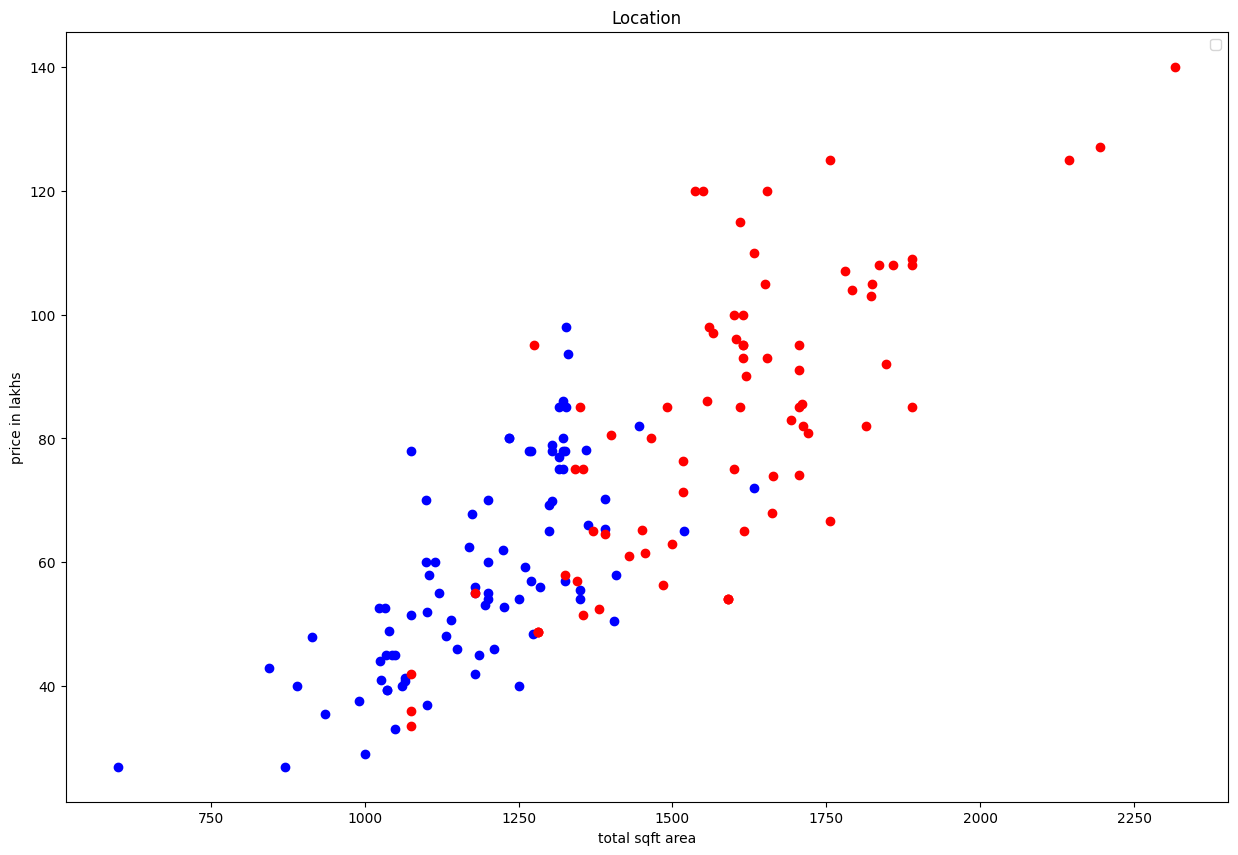

In [29]:
scatter_plotting(df_clean,"Yelahanka")

In [30]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        
        # collect stats for each BHK
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df['price_per_sqft']),
                'std': np.std(bhk_df['price_per_sqft']),
                'count': bhk_df.shape[0]
            }
        
        # compare bhk with (bhk-1)
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count'] > 5:
                bad_index = bhk_df[bhk_df['price_per_sqft'] < stats['mean']].index.values
                exclude_indices = np.append(exclude_indices, bad_index)
    
    return df.drop(exclude_indices, axis='index')


df_copy3 = remove_bhk_outliers(df_clean)

In [31]:
df_copy3.shape

(8408, 7)

C:\Users\HP\AppData\Local\Temp\ipykernel_948\436632884.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


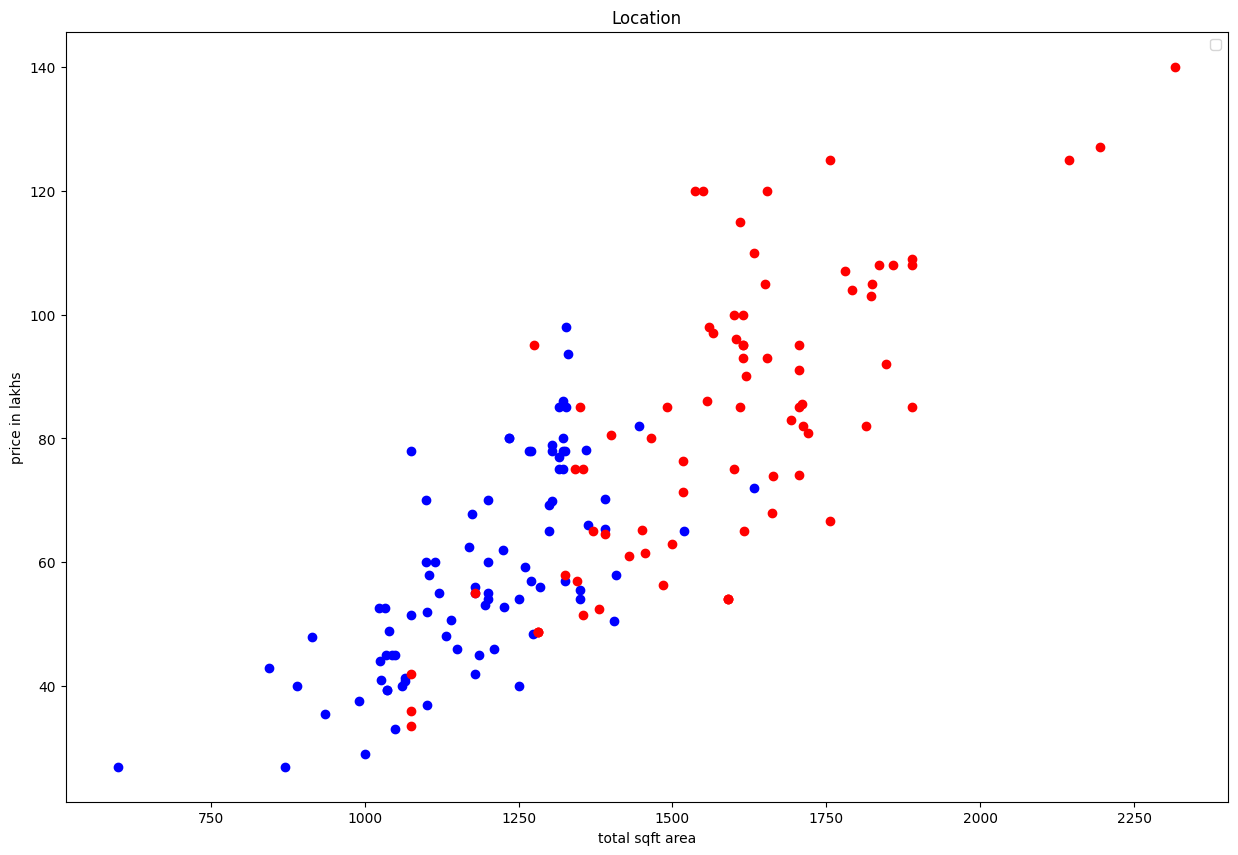

In [32]:
scatter_plotting(df_clean,"Yelahanka")

<Axes: xlabel='price_per_sqft', ylabel='Count'>

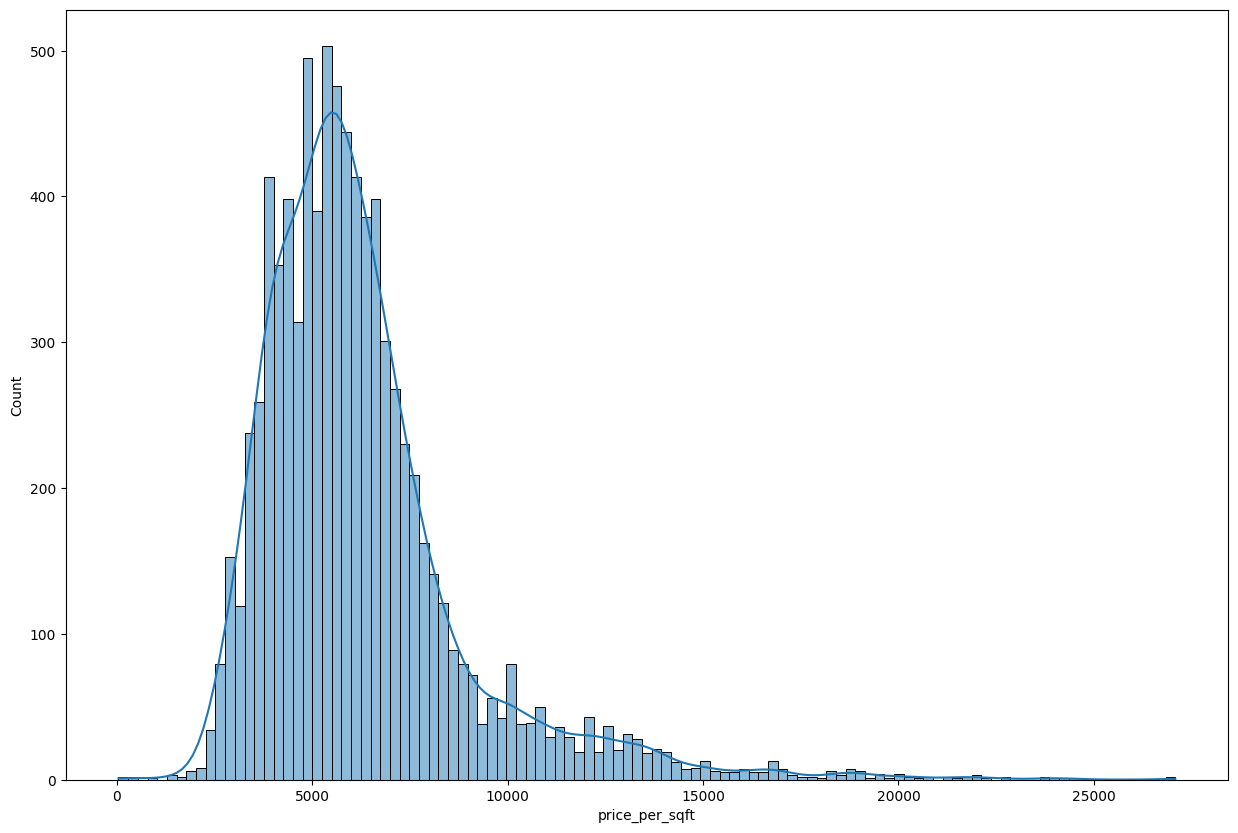

In [33]:
import seaborn as sns
sns.histplot(x=df_copy3['price_per_sqft'],kde=True)

In [34]:
#bath
df_copy3['bath'].unique()

array([ 4.,  3.,  2.,  5.,  1.,  8.,  7.,  6.,  9., 12., 10., 16., 13.])

In [35]:
df_copy3.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,4 Bedroom,2400.0,4.0,450.0,4,18750.000000
4,1st Block Jayanagar,2 BHK,1000.0,3.0,60.0,2,6000.000000


<Axes: xlabel='bath', ylabel='Count'>

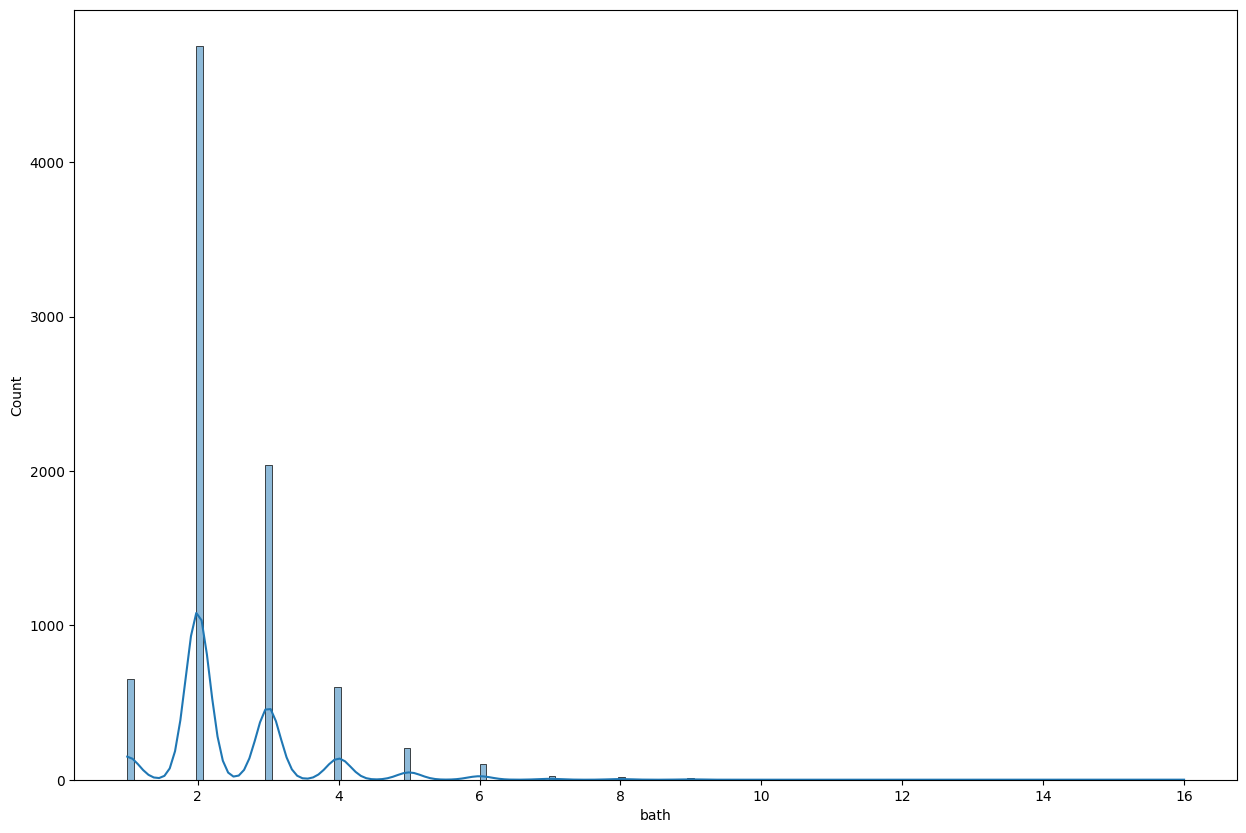

In [36]:
sns.histplot(x=df_copy3['bath'],kde=True)

In [37]:
# lets remove baths > bhk+1
df_copy3[df_copy3['bath'] > df_copy3['bhk']+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1840,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
6142,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6745,Rajaji Nagar,5 BHK,7500.0,8.0,1700.0,5,22666.666667
7972,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
9810,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [38]:
df_new = df_copy3[df_copy3['bath'] < df_copy3['bhk']+2]
df_new.shape

(8318, 7)

In [39]:
df_final = df_new.drop(columns=['price_per_sqft','size']) #removing size as bhk present, price_per_sqft cause mainly used only to remove outliers

In [40]:
df_final.shape


(8318, 5)

OneHotEncoding of Location and Training model

In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import xgboost as xgb
import joblib

# Suppose df_final has columns: ['total_sqft', 'bath', 'bhk', 'location', ...]
# and target column 'price'

X = df_final[['total_sqft', 'bath', 'bhk', 'location']]
y = df_final['price']

# One-hot encode location
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_loc = encoder.fit_transform(X[['location']])
encoded_df = pd.DataFrame(encoded_loc, columns=encoder.get_feature_names_out(['location']))

# Drop original location column and add encoded columns
X = X.drop('location', axis=1)
X = pd.concat([X.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)

# Save the feature columns (important for prediction later)
feature_columns = X.columns


In [42]:
df_final.shape

(8318, 5)

In [43]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8318 entries, 0 to 11666
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    8318 non-null   object 
 1   total_sqft  8318 non-null   float64
 2   bath        8318 non-null   float64
 3   price       8318 non-null   float64
 4   bhk         8318 non-null   int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 389.9+ KB


In [44]:
df_final.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,2400.0,4.0,450.0,4
4,1st Block Jayanagar,1000.0,3.0,60.0,2


In [45]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Train XGBoost regressor
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=500, learning_rate=0.1, max_depth=3)
xgb_model.fit(X_train, y_train)

# Check performance
print("Train R²:", xgb_model.score(X_train, y_train))
print("Test R²:", xgb_model.score(X_test, y_test))


Train R²: 0.8956319711511913
Test R²: 0.8539222173247335


In [46]:
def predict_price(location, total_sqft, bhk, bath, model, encoder, feature_columns):
    import pandas as pd

    # create a single-row dataframe
    df = pd.DataFrame([[location, total_sqft, bhk, bath]], columns=['location','total_sqft','bhk','bath'])
    
    # encode location
    encoded_loc = encoder.transform(df[['location']])  # returns NumPy array
    encoded_df = pd.DataFrame(encoded_loc, columns=encoder.get_feature_names_out(['location']))
    
    df = df.drop('location', axis=1)
    df = pd.concat([df, encoded_df], axis=1)
    
    # Add missing columns (locations not present in this input)
    missing_cols = set(feature_columns) - set(df.columns)
    for col in missing_cols:
        df[col] = 0
    
    # Reorder columns to match training
    df = df[feature_columns]
    
    # Predict
    return model.predict(df)[0]


In [47]:
predicted_price = predict_price(
    location='Electronic City Phase II',
    total_sqft=1200,
    bhk=2,
    bath=2,
    model=xgb_model,
    encoder=encoder,
    feature_columns=feature_columns
)

print("Predicted price (in lakhs):", predicted_price)


Predicted price (in lakhs): 55.874382


In [50]:
import os 
import pickle
pickle_folder = r"d:\Price_prediction\Pickle"
os.makedirs(pickle_folder, exist_ok=True)

# Save model
joblib.dump(xgb_model, os.path.join(pickle_folder, "model.pkl"))

# Save encoder
joblib.dump(encoder, os.path.join(pickle_folder, "encoder.pkl"))

# Save feature column order
joblib.dump(feature_columns, os.path.join(pickle_folder, "feature_columns.pkl"))

['d:\\Price_prediction\\Pickle\\feature_columns.pkl']